In [14]:
!pip install pycaret==2.3.5

  Using cached pycaret-2.3.5-py3-none-any.whl.metadata (11 kB)
  Using cached scipy-1.5.4.tar.gz (25.2 MB)
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [15]:
!pip install pycaret[full]

In [16]:
# check installed version
import pycaret
pycaret.__version__

'3.3.2'

In [17]:
# Upload file
from google.colab import files
uploaded = files.upload()

Saving fraud_oracle.csv to fraud_oracle (1).csv


In [18]:
# Import necessary libraries
from pycaret.classification import *
import pandas as pd


In [19]:
# Loading the dataset
data = pd.read_csv('fraud_oracle.csv')

In [20]:
# checking the first few rows of the dataset
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [21]:
# Checking for any missing values
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

,0
Month,0
WeekOfMonth,0
DayOfWeek,0
Make,0
AccidentArea,0
DayOfWeekClaimed,0
MonthClaimed,0
WeekOfMonthClaimed,0
Sex,0
MaritalStatus,0


In [22]:
# Inspect the columns
data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [23]:
# Inspect the specific column
clf = setup(data, target='FraudFound_P', use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Description,Value
0,Session id,1345
1,Target,FraudFound_P
2,Target type,Binary
3,Original data shape,"(15420, 33)"
4,Transformed data shape,"(15420, 143)"
5,Transformed train set shape,"(10794, 143)"
6,Transformed test set shape,"(4626, 143)"
7,Numeric features,8
8,Categorical features,24
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

In [24]:
# Compare different classification models and find the best one
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9557,0.9649,0.3884,0.7478,0.5088,0.4883,0.5183,1.1760
lightgbm,Light Gradient Boosting Machine,0.9515,0.9541,0.2492,0.8050,0.3774,0.3598,0.4293,1.0010
catboost,CatBoost Classifier,0.9492,0.9590,0.2044,0.7987,0.3241,0.3074,0.3871,31.3900
gbc,Gradient Boosting Classifier,0.9435,0.8834,0.0650,0.8663,0.1194,0.1123,0.2235,3.5650
et,Extra Trees Classifier,0.9412,0.8229,0.0248,0.8167,0.0479,0.0443,0.1335,1.7090
ridge,Ridge Classifier,0.9404,0.7895,0.0047,0.2000,0.0091,0.0086,0.0292,0.7430
rf,Random Forest Classifier,0.9402,0.8299,0.0046,0.2500,0.0091,0.0082,0.0313,1.6990
dummy,Dummy Classifier,0.9402,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.7250
lr,Logistic Regression,0.9399,0.7930,0.0016,0.1000,0.0031,0.0022,0.0091,2.9250
svm,SVM - Linear Kernel,0.9387,0.5322,0.0000,0.0000,0.0000,-0.0027,-0.0050,1.2330


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [28]:
# Finetume the best model for optimal performances
tuned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9602,0.9564,0.6462,0.6774,0.6614,0.6403,0.6405
1,0.9639,0.9788,0.7077,0.6970,0.7023,0.6831,0.6831
2,0.9583,0.9675,0.6923,0.6429,0.6667,0.6445,0.6450
3,0.9583,0.9722,0.6154,0.6667,0.6400,0.6179,0.6185
4,0.9611,0.9705,0.7031,0.6618,0.6818,0.6611,0.6615
5,0.9518,0.9521,0.5938,0.5938,0.5938,0.5681,0.5681
6,0.9574,0.9572,0.6562,0.6364,0.6462,0.6235,0.6236
7,0.9592,0.9711,0.7188,0.6389,0.6765,0.6548,0.6561
8,0.9546,0.9504,0.7077,0.6053,0.6525,0.6283,0.6305


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


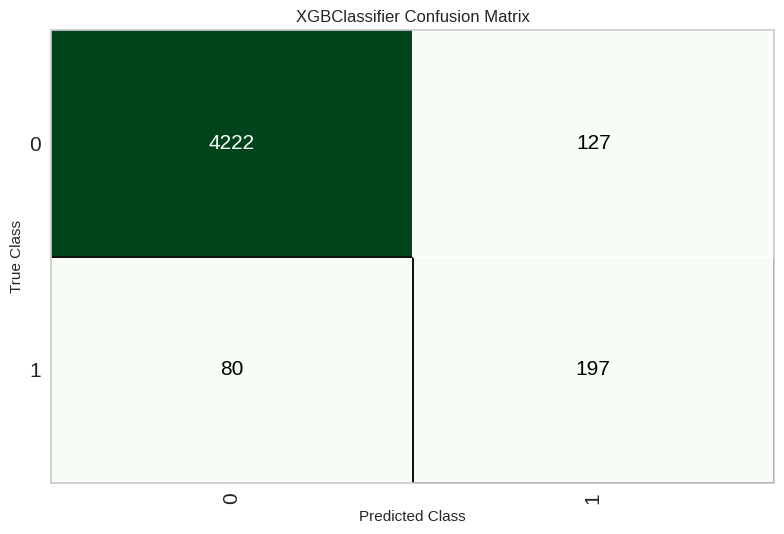

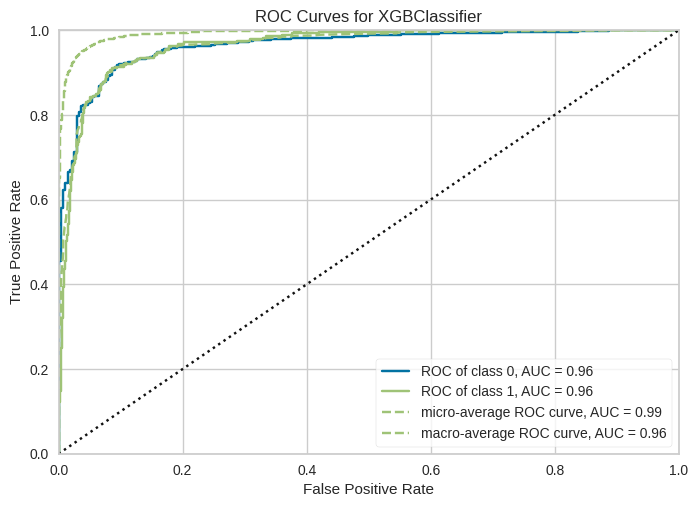

In [29]:
# Plot evaluation metrics to asses the perfirmance of the tuned model
plot_model(tuned_model, plot='confusion_matrix')
plot_model(tuned_model, plot='auc')

In [30]:
# save the model
save_model(tuned_model, 'fraud_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['WeekOfMonth',
                                              'WeekOfMonthClaimed', 'Age',
                                              'PolicyNumber', 'RepNumber',
                                              'Deductible', 'DriverRating',
                                              'Year'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('c...
          